# Import Necessary Modules

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to add Gaussian Noise

In [17]:
def add_gaussian_noise(image, mean=0, stddev=50): # mean (μ) = mean, standard deviation (σ) = stddev
    noise = np.random.normal(mean, stddev, image.shape)
    noise_image = image.astype(np.float32) + noise
    noise_image = np.clip(noise_image, 0, 255).astype(np.uint8)
    return noise_image, noise

# Take grayscale image of size 512x512, add some Gaussian noise and perform the following operations in frequency domain

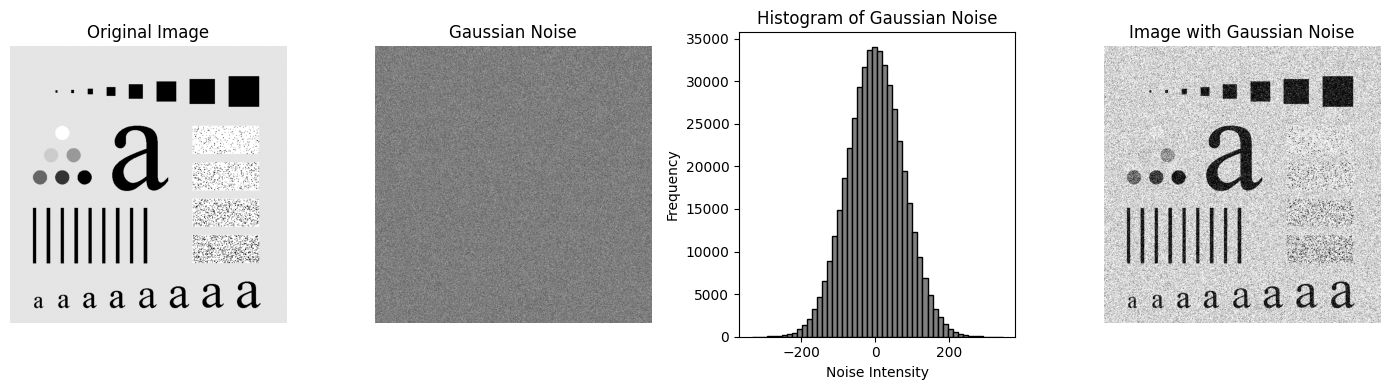

In [18]:

img = cv2.imread('character.tif', cv2.IMREAD_GRAYSCALE)

noise_image, noise = add_gaussian_noise(img, 0, 75)

plt.figure(figsize=(14, 4))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(noise, cmap="gray")
plt.title("Gaussian Noise")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.hist(noise.ravel(), bins=50, color='gray', edgecolor='black')
plt.title("Histogram of Gaussian Noise")
plt.xlabel("Noise Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 4, 4)
plt.imshow(noise_image, cmap="gray")
plt.title("Image with Gaussian Noise")
plt.axis("off")

plt.tight_layout()
plt.show()

**Butterworth Filter:**
$\qquad H(u, v) = \frac{1}{1 + \left[ \frac{D(u, v)}{D_0} \right]^{2n}}$

**Gaussian Filter:**
$\qquad H(u, v) = e^{-\frac{D^2(u, v)}{2D_0^2}}$

**Where:**
$\qquad D(u, v) = \sqrt{\left(u - \frac{M}{2}\right)^2 + \left(v - \frac{N}{2}\right)^2}$

In [19]:
def butterworth_filter(image, D0, n):
  image_fft = np.fft.fftshift(np.fft.fft2(image))
  M, N = image.shape
  butterworth_filter = np.zeros((M, N), dtype=np.float64)

  for u in range(M):
    for v in range(N):
      D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
      butterworth_filter[u, v] = 1 / (1 + (D / D0) ** (2 * n))

  filtered_image = image_fft * butterworth_filter
  filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
  filtered_image = np.abs(filtered_image)
  return filtered_image

In [20]:
def gaussian_filter(image, D0):
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    M, N = image.shape
    gaussian_filter = np.zeros((M, N), dtype=np.float32)

    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
            gaussian_filter[u, v] = np.exp(-(D ** 2) / (2 * (D0 ** 2)))

    filtered_fft = image_fft * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_image = np.abs(filtered_image)
    return filtered_image

# (a) Apply 4th order Butterworth and Gaussian low pass filter to analyze their performance quantitatively

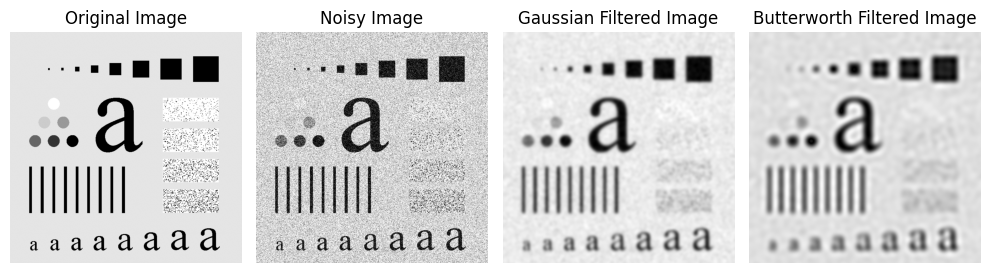

In [21]:
gaussian_filtered_image = gaussian_filter(noise_image, 25)
butterworth_filtered_image = butterworth_filter(noise_image, 25, 4)

plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(noise_image, cmap="gray")
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(gaussian_filtered_image, cmap="gray")
plt.title("Gaussian Filtered Image")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(butterworth_filtered_image, cmap="gray")
plt.title("Butterworth Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Ideal Low Pass Filter Function

**Ideal Low-Pass Filter (ILPF) in Frequency Domain:**

$\qquad H(u, v) = \begin{cases}
    1 & \text{if } D(u, v) \le D_0 \\
    0 & \text{if } D(u, v) > D_0
\end{cases}$

### **Where:**

- $H(u, v)$ is the **transfer function** of the ideal low-pass filter in the frequency domain at frequency coordinates $(u, v)$.

- $D(u, v)$ is the **distance from the center** of the frequency domain to the point $(u, v)$. It is typically calculated as:

  $$
  D(u, v) = \sqrt{\left(u - \frac{M}{2}\right)^2 + \left(v - \frac{N}{2}\right)^2}
  $$

  where $M \times N$ is the size of the image.

- $D_0$ is the **cutoff frequency**, which determines the radius of the circle in the frequency domain that passes frequencies without attenuation. Frequencies outside this circle are completely attenuated.


In [22]:
def ideal_low_pass_filter(image, D0):
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    M, N = image.shape
    ideal_filter = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
            if D <= D0:
                ideal_filter[u, v] = 1
            else:
                ideal_filter[u, v] = 0

    filtered_fft = image_fft * ideal_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_image = np.abs(filtered_image)
    return filtered_image


# (b) Observe the ringing effect of ideal low pass filter on the image. Use different radius (D0) of ideal low pass filter and display their results

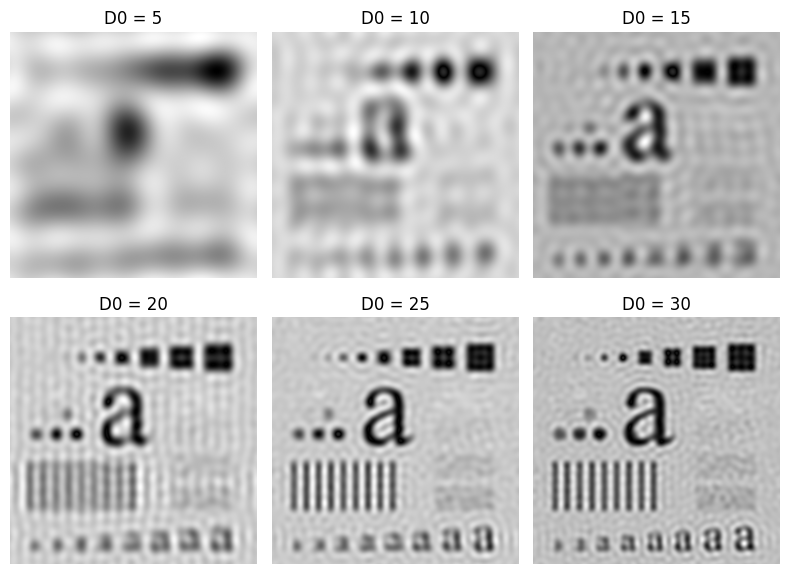

In [23]:
plt.figure(figsize=(8, 6))

for i in range (1, 7):
  filtered_image = ideal_low_pass_filter(noise_image, i*5)
  plt.subplot(2, 3, i)
  plt.imshow(filtered_image, cmap="gray")
  plt.title(f"D0 = {i*5}")
  plt.axis("off")

plt.tight_layout()
plt.show()

# Ideal highpass filter

In [24]:
def ideal_high_pass_filter(image, D0):
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    M, N = image.shape
    ideal_filter = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
            if D > D0:
                ideal_filter[u, v] = 1
            else:
                ideal_filter[u, v] = 0

    filtered_fft = image_fft * ideal_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_image = np.abs(filtered_image)
    return filtered_image

# Gaussian highpass filter

In [25]:
def gaussian_high_pass_filter(image, D0):
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    M, N = image.shape
    gaussian_filter = np.zeros((M, N), dtype=np.float32)

    for u in range(M):
      for v in range(N):
        D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
        gaussian_filter[u, v] = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))

    filtered_fft = image_fft * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_image = np.abs(filtered_image)
    return filtered_image

# Butterworth highpass filter

In [26]:
def butterworth_high_pass_filter(image, D0, n):
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    M, N = image.shape
    butterworth_filter = np.zeros((M, N), dtype=np.float64)

    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M // 2) ** 2 + (v - N // 2) ** 2)
            if D == 0: # Skip division by 0, block DC component
                butterworth_filter[u, v] = 0
            else:
                butterworth_filter[u, v] = 1 / (1 + (D0 / D) ** (2 * n))

    filtered_image = image_fft * butterworth_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    filtered_image = np.abs(filtered_image)
    return filtered_image

# (c) Perform edge detection of given the noise and clean image using ideal and Gaussian high pass filters.

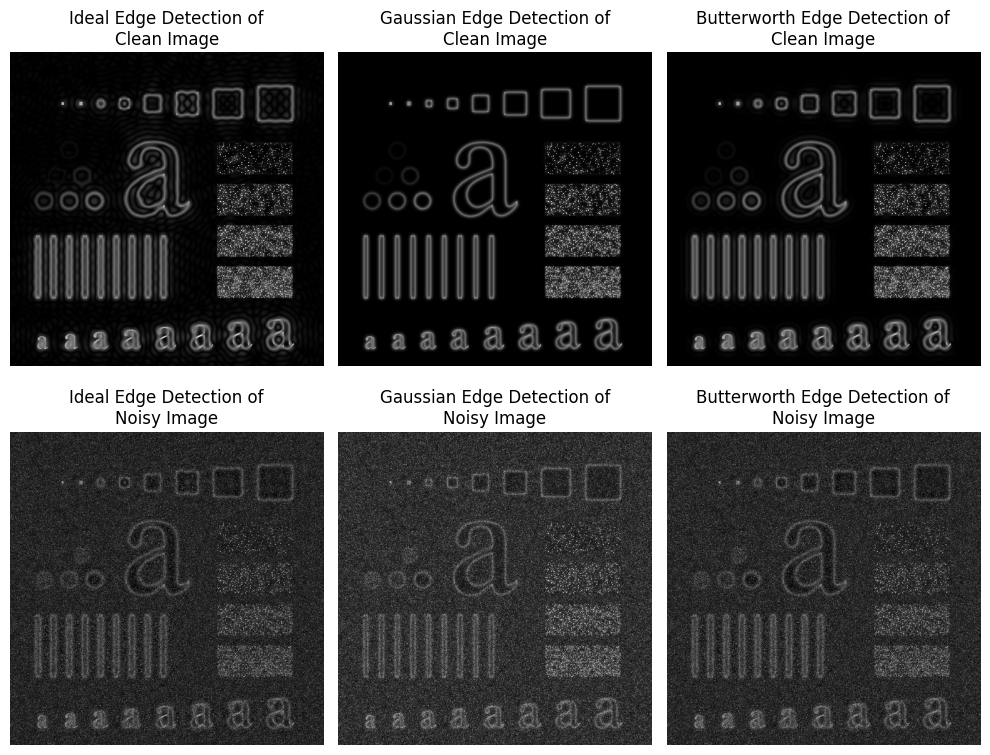

In [27]:
# Edge detection of clean image
ideal_edge_clean = ideal_high_pass_filter(img, 30)
gaussian_edge_clean = gaussian_high_pass_filter(img, 30)
butterworth_edge_clean = butterworth_high_pass_filter(img, 30, 4)

# Edge detection of noisy image
ideal_edge_noise = ideal_high_pass_filter(noise_image, 30)
gaussian_edge_noise = gaussian_high_pass_filter(noise_image, 30)
butterworth_edge_noise = butterworth_high_pass_filter(noise_image, 30, 4)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(ideal_edge_clean, cmap="gray")
plt.title("Ideal Edge Detection of\nClean Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gaussian_edge_clean, cmap="gray")
plt.title("Gaussian Edge Detection of\nClean Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(butterworth_edge_clean, cmap="gray")
plt.title("Butterworth Edge Detection of\nClean Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(ideal_edge_noise, cmap="gray")
plt.title("Ideal Edge Detection of\nNoisy Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_edge_noise, cmap="gray")
plt.title("Gaussian Edge Detection of\nNoisy Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(butterworth_edge_noise, cmap="gray")
plt.title("Butterworth Edge Detection of\nNoisy Image")
plt.axis("off")

plt.tight_layout()
plt.show()